In [1]:
import scipy as sp
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.interpolate import griddata

## Reconstruction of the Sin[x] function

In [3]:
def funcSin(x):
    return np.sin(np.pi * 2 * x)

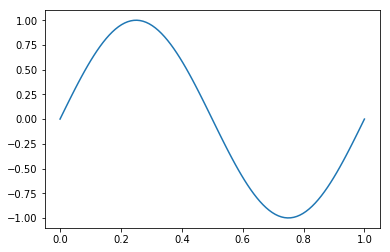

In [4]:
grid_x = np.mgrid[0:1:100j]
plt.plot(grid_x, funcSin(grid_x))

(0, 1)

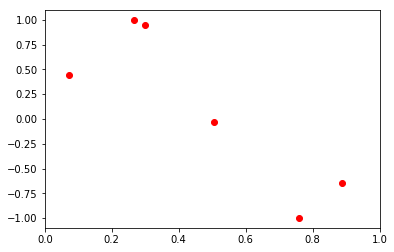

In [10]:
points = np.random.rand(6, 1)
values = funcSin(points)

plt.plot(points, values, 'or')
plt.xlim([0,1])

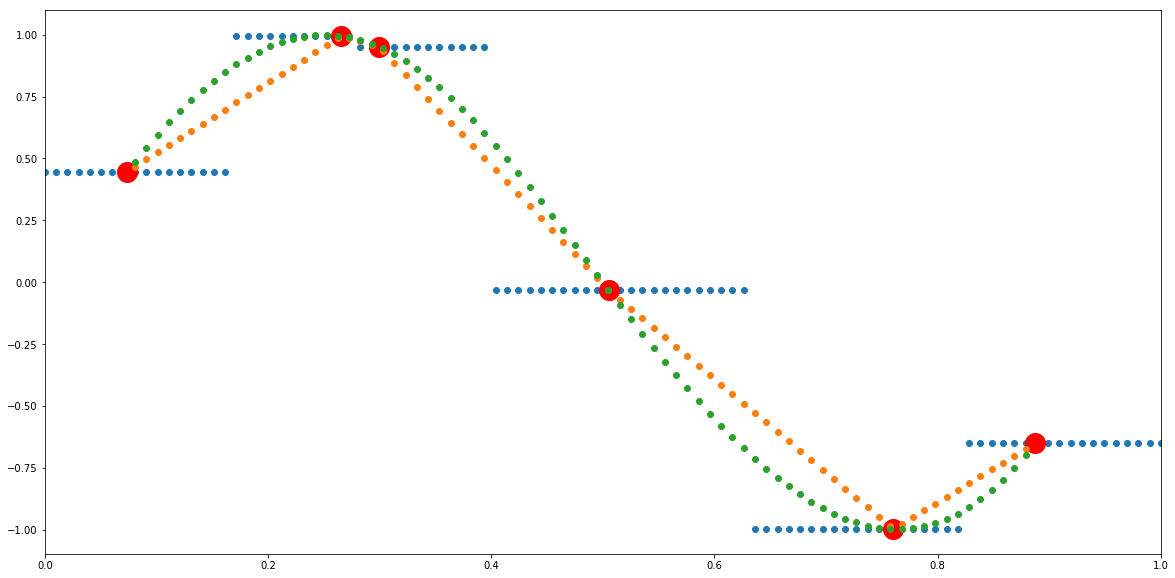

In [11]:
#griddata(points,values,xi,method)
#points: data points coordinates - ti
#values: data points values - yi
#xi: points at which to interpolate data (corresponding values are returned)
grid_z0 = griddata(points, values, grid_x, method='nearest')
plt.figure(figsize=(20,10))
plt.plot(grid_x, grid_z0, 'o')
plt.plot(points, values, 'ro', ms=20)
plt.xlim([0,1])

grid_z0 = griddata(points, values, grid_x, method='linear')
plt.plot(grid_x, grid_z0, 'o')


grid_z0 = griddata(points, values, grid_x, method='cubic')
plt.plot(grid_x, grid_z0, 'o')


# Make an "image"

Here we're going to make a "true" image.

[Scipy Interpolation Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

In [12]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

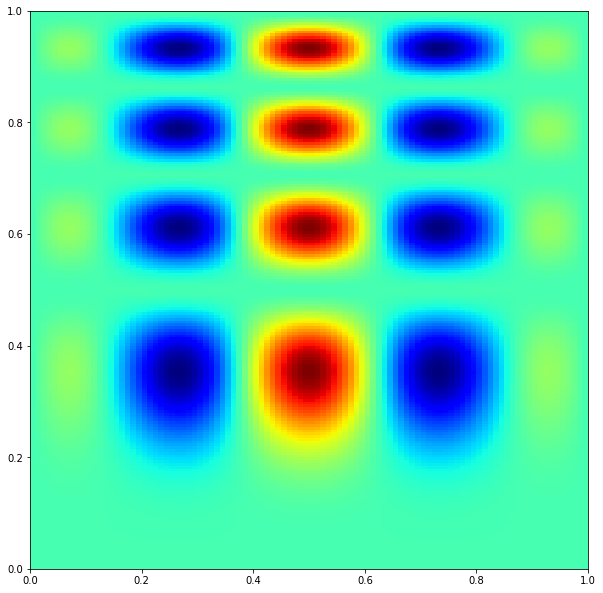

In [13]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
img = func(grid_x, grid_y)
plt.figure(figsize=(10,20))
plt.imshow(img.T, extent=(0,1,0,1), origin='lower', cmap=plt.cm.jet, interpolation = 'none')

# Sample an image

Now we're going to sample the image at a bunch of points -- this is the data we'e collected.

In [19]:
points = np.random.rand(500, 2)
values = func(points[:,0], points[:,1])

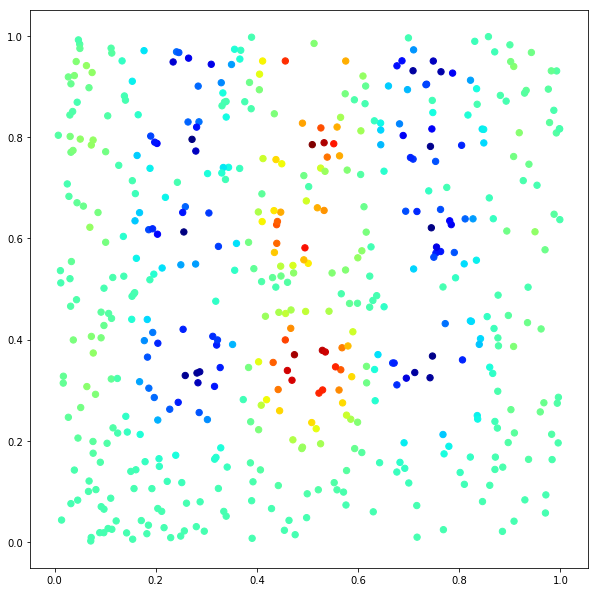

In [20]:
plt.figure(figsize=(10,20))
plt.scatter(points[:,0], points[:,1], c=values, s=40, cmap=plt.cm.jet)
_ = plt.axis('scaled')

# How do we "fill in" the missing data?

Scipy has a function called `griddata`

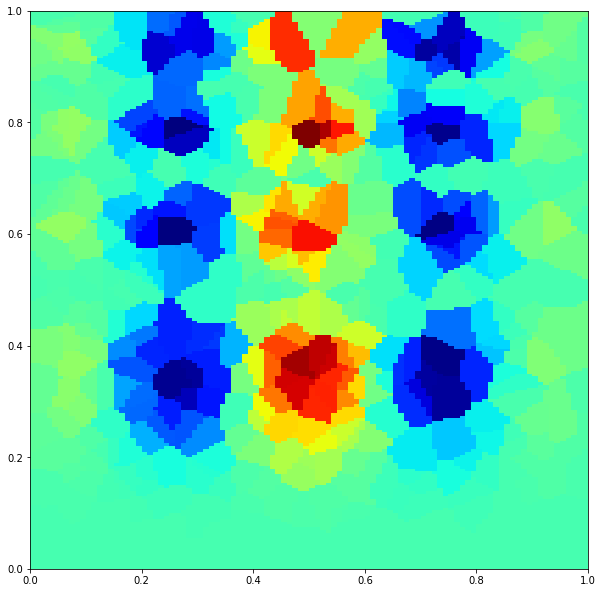

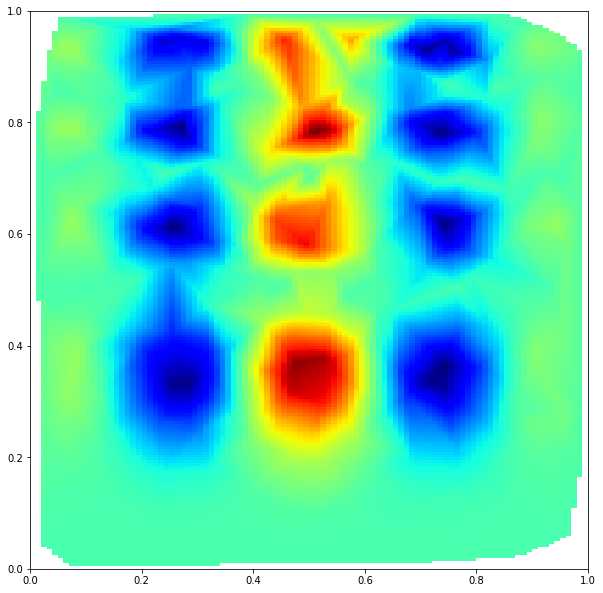

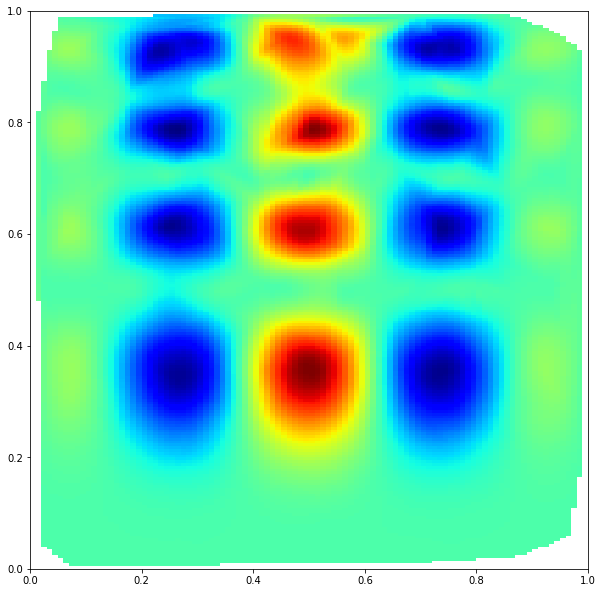

In [21]:
# contstant
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
plt.figure(figsize=(10,20))
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap=plt.cm.jet)


# linear
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
plt.figure(figsize=(10,20))
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap=plt.cm.jet)


# cubic
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
plt.figure(figsize=(10,20))
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap=plt.cm.jet)